In [1]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image

In [24]:
path = 'C:\\Users\\JIN\\Desktop\\machine\\homework2\\data\\测试图像集'
i = [];j = [];k = []
for _, dirnames, filenames in os.walk(path):
    if len(_)!=49 and _[-6:]!='letter' and _[-3:]!='num' and _[-4:]!='word':
        i+=[_]
    if dirnames!=[]:
        j+=[dirnames]
    if filenames!=[]:
        k+=[filenames]
dict_all = {}
tb = 0
for heads in j[1:]:
    for head in heads:
        dict_all.update({head:[]})
        for back in k[tb]:
            dirs = i[tb]+'\\'+back
            dict_all[head]+=[dirs]
        tb+=1
dict_dict = {'0': 0,'1': 1,'2': 2,'3': 3,'4': 4,'5': 5,'6': 6,'7': 7,'8': 8,'9': 9,'川': 11,'鄂': 12,'甘': 13,'赣': 14,'桂': 16,'贵': 17,'黑': 18,'沪': 19,'吉': 20,'冀': 21,'津': 22,'晋': 23,'京': 24,'辽': 25,'鲁': 26,'蒙': 27,'闽': 28,'宁': 29,'青': 30,'琼': 31,'陕': 32,'苏': 33,'皖': 34,'湘': 35,'渝': 37,'豫': 38,
'粤': 39,'云': 40,'浙': 41,'A': 42,'B': 43,'C': 44,'D': 45,'E': 46,'F': 47,'G': 48,'H': 49,'J': 51,'K': 52,'L': 53,'M': 54,'N': 55,'P': 57,'Q': 58,'R': 59,'S': 60,'T': 61,'U': 62,'V': 63,'W': 64,'X': 65,'Y': 66,'Z': 67}   
writer = tf.python_io.TFRecordWriter("alls.tfrecords")
for labels in dict_all.keys():
    for imgs in dict_all[labels]:
        img = Image.open(imgs)
        #img = img.convert('1')
        img = img.resize((24,48), Image.ANTIALIAS)
        images = img.tobytes()
        try:
            label = dict_dict[labels]
        except:
            print('在字典中不能正常获得标签')
        example = tf.train.Example(features = tf.train.Features(feature = {
                         "label": tf.train.Feature(int64_list=tf.train.Int64List(value = [label])),
                         'img': tf.train.Feature(bytes_list=tf.train.BytesList(value = [images]))
                         })) 
        writer.write(example.SerializeToString())
writer.close()

In [3]:
dicts_dicts={}
for key,value in dict_dict.items():
    dicts_dicts.update({value:key})

(1,) (1, 48, 24, 1)
A


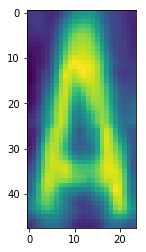

(1,) (1, 48, 24, 1)
E


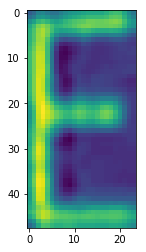

In [5]:
def read_tfrecord(path):
    filename_queue = tf.train.string_input_producer([path])
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)
    features = tf.parse_single_example(serialized_example,
                                       features={
                                       'label': tf.FixedLenFeature([], tf.int64),
                                       'img' : tf.FixedLenFeature([], tf.string),
                                       })
    image = tf.decode_raw(features['img'], tf.uint8)
    image = tf.cast(image, dtype='float32')*(1/255)-0.5 
    image = tf.reshape(image, [48, 24, 3])
    image = tf.split(image, 3, 2)[0]
    #image = tf.split(image, num_or_size_splits=3, axis=1)[0]
    label = tf.cast(features['label'], tf.int32)
    return image, label

import matplotlib.pyplot as plt
image, label = read_tfrecord("all_s.tfrecords")
image_batch, label_batch = tf.train.shuffle_batch([image,label], batch_size=1, capacity=6000, min_after_dequeue=5999, num_threads=2) 
init = tf.local_variables_initializer()
ii=[]
with tf.Session() as sess:
    sess.run(init)
    coord = tf.train.Coordinator() #创建一个协调器，管理线程
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)   #启动QueueRunner, 此时文件名队列已经进队
    for i in range(2):  # 规定出队数量
        img, label = sess.run([image_batch, label_batch])
        print(label.shape,img.shape)
        for j in range(1):
            print(dicts_dicts[label[j]])
            im = img[j].reshape(48,24)
            plt.imshow(im)
            plt.show()
    coord.request_stop()
    coord.join(threads)

In [6]:
ii = []
jj = []
labelss = []
image, label = read_tfrecord("all_s.tfrecords")
#image_batch, label_batch = tf.train.shuffle_batch([image,label], batch_size=1, capacity=2000, min_after_dequeue=0, num_threads=2) 
with tf.Session() as sess:
    sess.run(init)
    coord = tf.train.Coordinator() #创建一个协调器，管理线程
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)   #启动QueueRunner, 此时文件名队列已经进队
    for i in range(18447):  # 规定出队数量
        img, labeless = sess.run([image, label])
        #for j in range(1):
        im = img.reshape(48,24)
        ii += [im]
        jj += [dicts_dicts[labeless]]
        labelss += [labeless]
    coord.request_stop()
    coord.join(threads)


In [7]:
label_count={}
letter_label_count = {}
for kk in dict_dict.keys():
    if kk not in ['I','O','广','新','藏']:
        label_count.update({kk:jj.count(kk)})

for kk in dicts_dicts.keys():
    if kk not in [50,56,15,10,36]:
        letter_label_count.update({kk:jj.count(dicts_dicts[kk])})
#print(label_count)

D:\anaconda\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


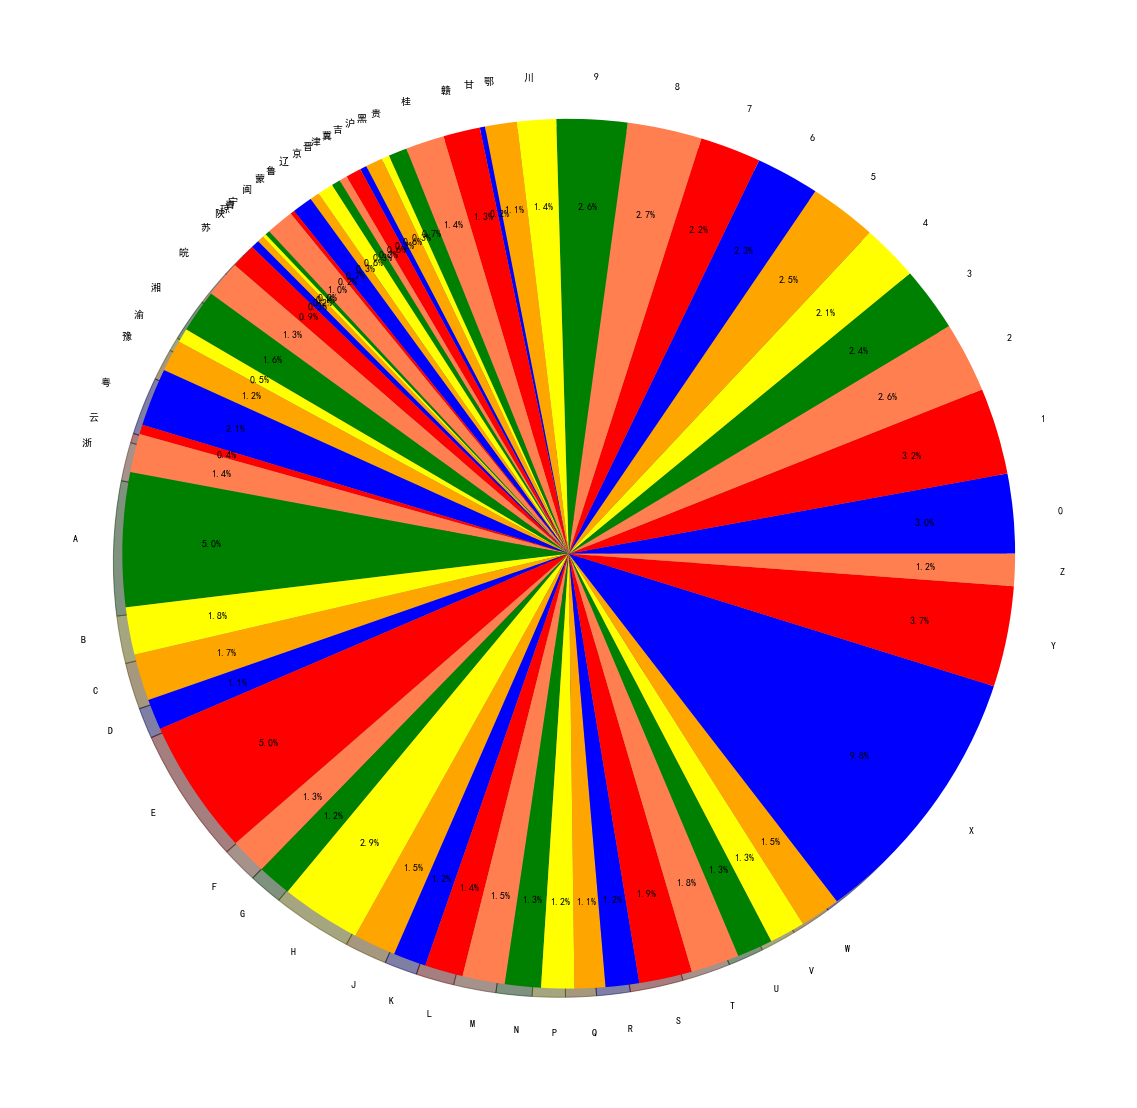

In [8]:
#coding:utf-8  
import matplotlib  
matplotlib.use('qt4agg')  
#指定默认字体  
matplotlib.rcParams['font.sans-serif'] = ['SimHei']   
matplotlib.rcParams['font.family']='sans-serif'  
plt.figure(1, figsize=(20,20))    
#expl = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]  
# Colors used. Recycle if not enough.  
colors  = ["blue","red","coral","green","yellow","orange"]  
# autopct: format of "percent" string;  
plt.pie(list(label_count.values()),  colors=colors, labels=list(label_count.keys()), autopct='%1.1f%%',pctdistance=0.8, shadow=True)  
plt.show()  

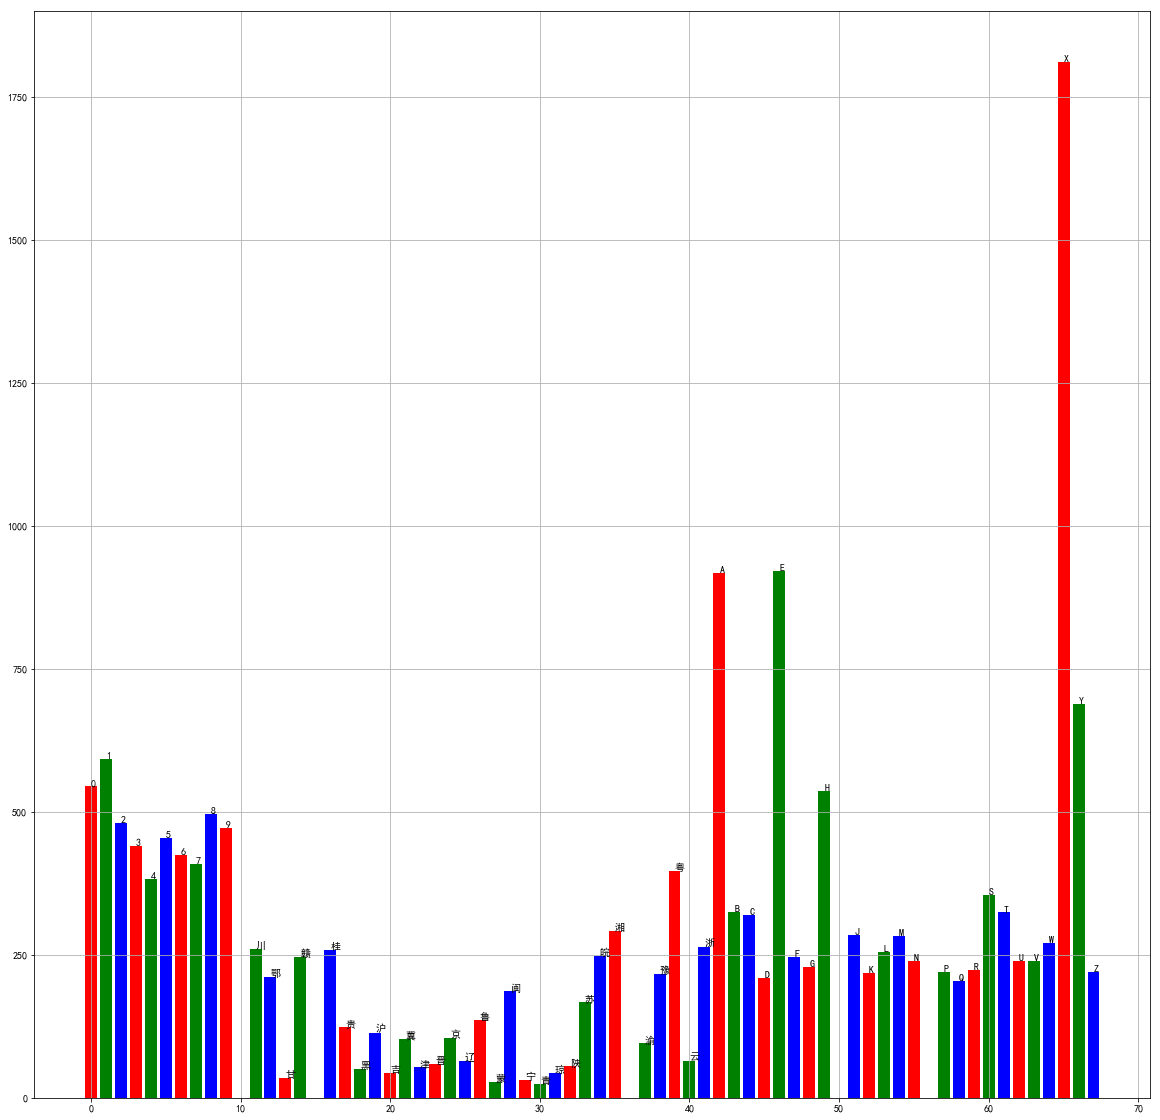

In [9]:
import matplotlib.pyplot as plt
plt.figure(2, figsize=(20,20))  
plt.bar(list(letter_label_count.keys()),list(letter_label_count.values()),color='rgb')
ll = 0
for iii in dicts_dicts.keys():
    plt.text(list(letter_label_count.keys())[ll],list(letter_label_count.values())[ll],dicts_dicts[iii])
    ll+=1
plt.grid()
plt.show()

In [10]:
c = list(zip(jj,ii))
import random
random.shuffle(c)
jj[:],ii[:]=zip(*c)

In [11]:
xtrain = ii[:15000]
ytrain = jj[:15000]
xtest = ii[15000:18000]
ytest = jj[15000:18000]
vtrain = ii[18000:18447]
vtest = jj[18000:18447]

In [12]:
xtrain = [ii[k].reshape(1152) for k in range(15000)]
xtest = [ii[k].reshape(1152) for k in range(15000,18000)]
vtrain = [ii[k].reshape(1152) for k in range(18000,18447)]

In [13]:
def knn_simple(xtrain, ytrain, xtest, ytest):
    start = time.time()
    xtr = tf.placeholder(tf.float32, [None, 1152])
    xte = tf.placeholder(tf.float32, [1152])
    
    distance = Euclidean_distance(xtr,xte)
    
    pred = tf.argmin(distance, 0)
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)
    right = 0
    for i in range(3000):
        if i % 100==0 and i !=0:
            print("已处理 {0}，正确率为{1}".format(i,right/i))
        #distance = sess.run(distance,{xtr: xtrain, xte: xtest[i]})
        index = sess.run(pred,{xtr: xtrain, xte: xtest[i]})
        #print(sess.run(distance[10036]))
        if np.argmax(ytest[i]) == np.argmax(ytrain[index]):	#这里的后半部分酌情更改
            right += 1.0
    print('总共处理%d 用时%f' %(3000,time.time()-start))
    print('正确数量%d 正确率为%f' %(right,right/3000))

In [14]:
def Euclidean_distance(xtr,xte):
    return tf.sqrt(tf.reduce_sum(tf.pow((xtr-xte), 2), reduction_indices=1))
import time
#knn_simple(xtrain, ytrain, xtest, ytest)

In [15]:
lbels = np.zeros([18447,68])
for i in range(len(jj)):
    lbels[i][dict_dict[jj[i]]]=1
for i in range(18447):
    ii[i] = ii[i].reshape(1152)
xtrain = ii[:15000]
xtest = ii[15000:18000]
vtrain = ii[18000:18447]
ytrain = lbels[:15000]
ytest = lbels[15000:18000]
vtest = lbels[18000:18447]

In [47]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.1))


def init_bias(shape):
    return tf.Variable(tf.constant(0.1, shape=shape))

In [98]:
sess = tf.InteractiveSession()

x_ = tf.placeholder(tf.float32, [None, 1152], name='image')
y = tf.placeholder(tf.float32, [None, 68], 'label')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')
x = tf.reshape(x_, [-1, 48, 24, 1], name='x')


w1 = init_weights([3, 3, 1, 32])
b1 = init_bias([32])
conv1 = tf.nn.relu(tf.nn.conv2d(x, w1,  strides=[1, 1, 1, 1], padding='SAME') + b1)  # shape=(?, 48, 24, 32)
pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  # # shape=(?, 24, 12, 32)



w2 = init_weights([3, 3, 32, 64])
b2 = init_bias([64])
conv2 = tf.nn.relu(tf.nn.conv2d(pool1, w2,  strides=[1, 1, 1, 1], padding='SAME') + b2)  # shape=(?, 24, 12, 64)
pool2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  # shape=(?, 12, 6, 64)

w3 = init_weights([3, 3, 64, 96])    
b3 = init_bias([96])
conv3 = tf.nn.relu(tf.nn.conv2d(pool2, w3,  strides=[1, 1, 1, 1], padding='SAME') + b3)  # shape=(?, 12, 6, 96)
pool3_ = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  # shape=(?, 6, 3, 96)


pool3 = tf.reshape(pool3_, [-1, 6*3*96])

w4 = init_weights([6 * 3 * 96, 512])
b4 = init_bias([512])
h = tf.nn.relu(tf.matmul(pool3, w4) + b4)

h = tf.nn.dropout(h, keep_prob)

w_o = init_weights([512, 68])
b_o = init_bias([68])
y_o = tf.matmul(h, w_o) + b_o


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_o, labels=y))
train_op = tf.train.AdamOptimizer().minimize(cost)
prediction = tf.equal(tf.argmax(y_o, 1), tf.argmax(y, 1))
y_label = tf.argmax(y_o,1)
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32), name='accuracy')

In [100]:
dict_count_num = {}
for i in dicts_dicts.keys():
    dict_count_num.update({i:0})
dict_count_nums = {}
for h in dicts_dicts.keys():
    dict_count_nums.update({h:0})

In [101]:
#image_batch, label_batch = tf.train.shuffle_batch([xtrain,ytrain], batch_size=50, capacity=2000, min_after_dequeue=1990, num_threads=2)
sess.run(tf.global_variables_initializer())
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)
bs = 0
for i in range(3000):
    train_data_x = xtrain[bs:bs+50]
    train_data_y = ytrain[bs:bs+50]
    if i % 100 == 0:
        train_accuracy, y_labels = sess.run([accuracy, y_label], feed_dict={x_: train_data_x, y: train_data_y, keep_prob: 1.0})
        print("step %d, accuracy:%g" % (i, train_accuracy))
        for j in range(50):
            dict_count_num[np.argmax(train_data_y[j])]+=1
            if np.argmax(train_data_y[j]) == y_labels[j]:
                dict_count_nums[ylabels[j]]+=1
    train_op.run(feed_dict={x_: train_data_x, y: train_data_y, keep_prob: 0.3})
    bs+=5


step 0, accuracy:0.02
step 100, accuracy:0.56
step 200, accuracy:0.8
step 300, accuracy:0.88
step 400, accuracy:0.96
step 500, accuracy:0.96
step 600, accuracy:0.94
step 700, accuracy:0.94
step 800, accuracy:0.98
step 900, accuracy:0.98
step 1000, accuracy:0.96
step 1100, accuracy:1
step 1200, accuracy:0.98
step 1300, accuracy:1
step 1400, accuracy:1
step 1500, accuracy:1
step 1600, accuracy:1
step 1700, accuracy:0.98
step 1800, accuracy:1
step 1900, accuracy:1
step 2000, accuracy:0.98
step 2100, accuracy:1
step 2200, accuracy:0.98
step 2300, accuracy:0.98
step 2400, accuracy:0.96
step 2500, accuracy:0.98
step 2600, accuracy:1
step 2700, accuracy:0.98
step 2800, accuracy:1
step 2900, accuracy:1


In [103]:
# for e in dict_count_num.keys():
#     print('%s的召回率为%1.1f'%(dicts_dicts[e],dict_count_nums[e]/dict_count_num[e]))

In [78]:

train_data_x = vtrain
train_data_y = vtest
train_accuracy = sess.run(accuracy, feed_dict={x_: train_data_x, y: train_data_y, keep_prob: 1.0})
print("step, accuracy: %g" % (train_accuracy))

step, accuracy: 0.973154


In [29]:
imgs_lan = []
lab_lan = []
lablss = []
image, label = read_tfrecord("alls.tfrecords")
#image_batch, label_batch = tf.train.shuffle_batch([image,label], batch_size=1, capacity=2000, min_after_dequeue=0, num_threads=2) 
with tf.Session() as sess:
    sess.run(init)
    coord = tf.train.Coordinator() #创建一个协调器，管理线程
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)   #启动QueueRunner, 此时文件名队列已经进队
    for i in range(5428):  # 规定出队数量
        img, labeless = sess.run([image, label])
        #for j in range(1):
        im = img.reshape(48,24)
        imgs_lan += [im]
        lab_lan += [dicts_dicts[labeless]]
        lablss += [labeless]
    coord.request_stop()
    coord.join(threads)

In [34]:
labels_count={}
letter_labels_count = {}
for kk in dict_dict.keys():
    if kk not in ['I','O','广','新','藏']:
        labels_count.update({kk:lab_lan.count(kk)})

for kk in dicts_dicts.keys():
    if kk not in [50,56,15,10,36]:
        letter_labels_count.update({kk:lab_lan.count(dicts_dicts[kk])})

In [33]:
print(lab_lan[:10])
print(lablss[:10])
print(dicts_dicts)
print(dict_dict)

['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
[42, 42, 42, 42, 42, 42, 42, 42, 42, 42]
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 11: '川', 12: '鄂', 13: '甘', 14: '赣', 16: '桂', 17: '贵', 18: '黑', 19: '沪', 20: '吉', 21: '冀', 22: '津', 23: '晋', 24: '京', 25: '辽', 26: '鲁', 27: '蒙', 28: '闽', 29: '宁', 30: '青', 31: '琼', 32: '陕', 33: '苏', 34: '皖', 35: '湘', 37: '渝', 38: '豫', 39: '粤', 40: '云', 41: '浙', 42: 'A', 43: 'B', 44: 'C', 45: 'D', 46: 'E', 47: 'F', 48: 'G', 49: 'H', 51: 'J', 52: 'K', 53: 'L', 54: 'M', 55: 'N', 57: 'P', 58: 'Q', 59: 'R', 60: 'S', 61: 'T', 62: 'U', 63: 'V', 64: 'W', 65: 'X', 66: 'Y', 67: 'Z'}
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '川': 11, '鄂': 12, '甘': 13, '赣': 14, '桂': 16, '贵': 17, '黑': 18, '沪': 19, '吉': 20, '冀': 21, '津': 22, '晋': 23, '京': 24, '辽': 25, '鲁': 26, '蒙': 27, '闽': 28, '宁': 29, '青': 30, '琼': 31, '陕': 32, '苏': 33, '皖': 34, '湘': 35, '渝': 37, '豫': 38, '粤': 39, '云': 40, '浙': 41, 'A': 42,

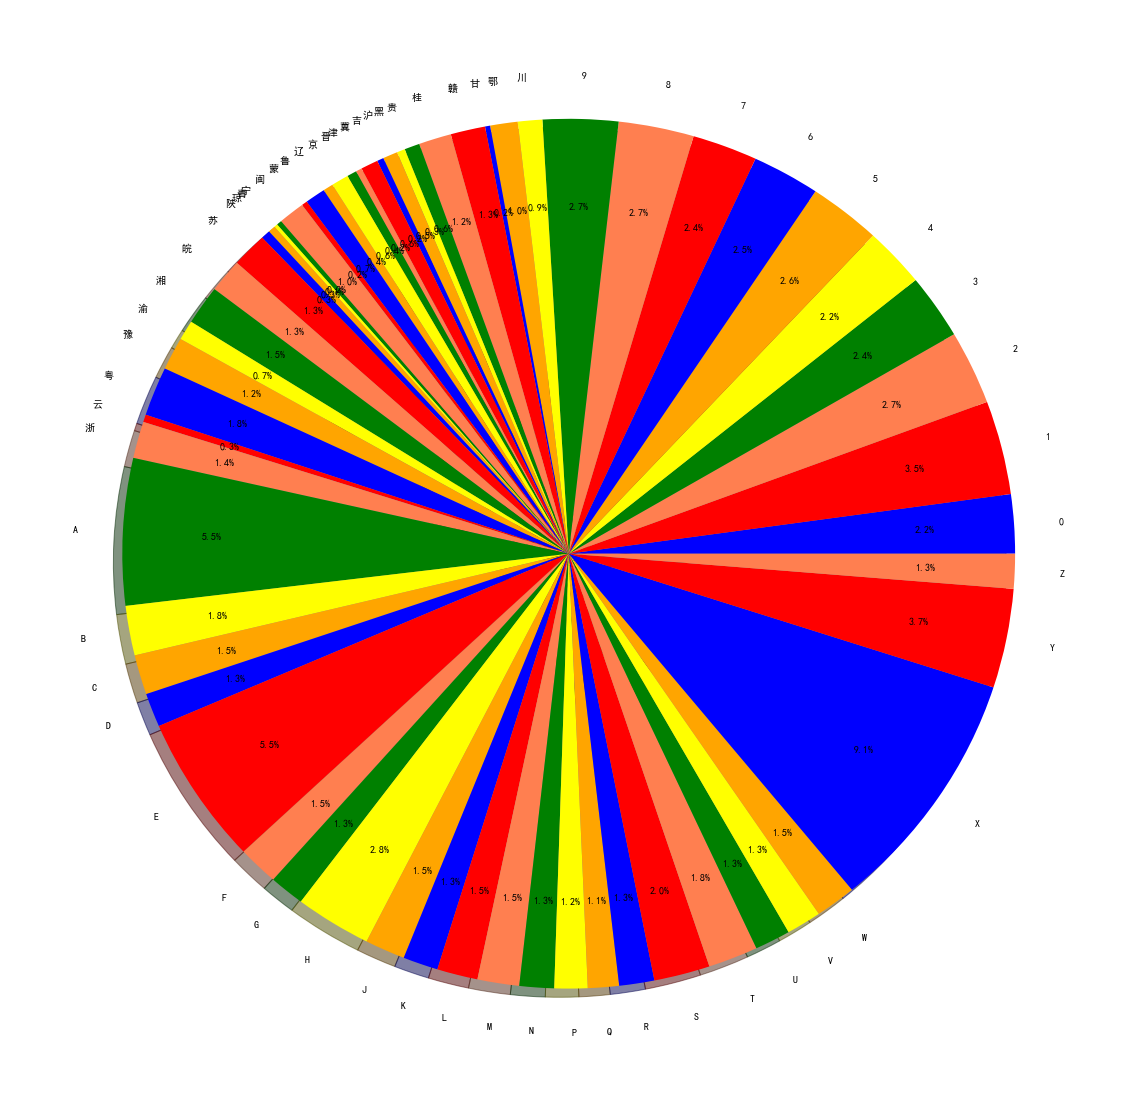

In [35]:
plt.figure(1, figsize=(20,20))    
colors  = ["blue","red","coral","green","yellow","orange"]    
plt.pie(list(labels_count.values()),  colors=colors, labels=list(labels_count.keys()), autopct='%1.1f%%',pctdistance=0.8, shadow=True)  
plt.show()  

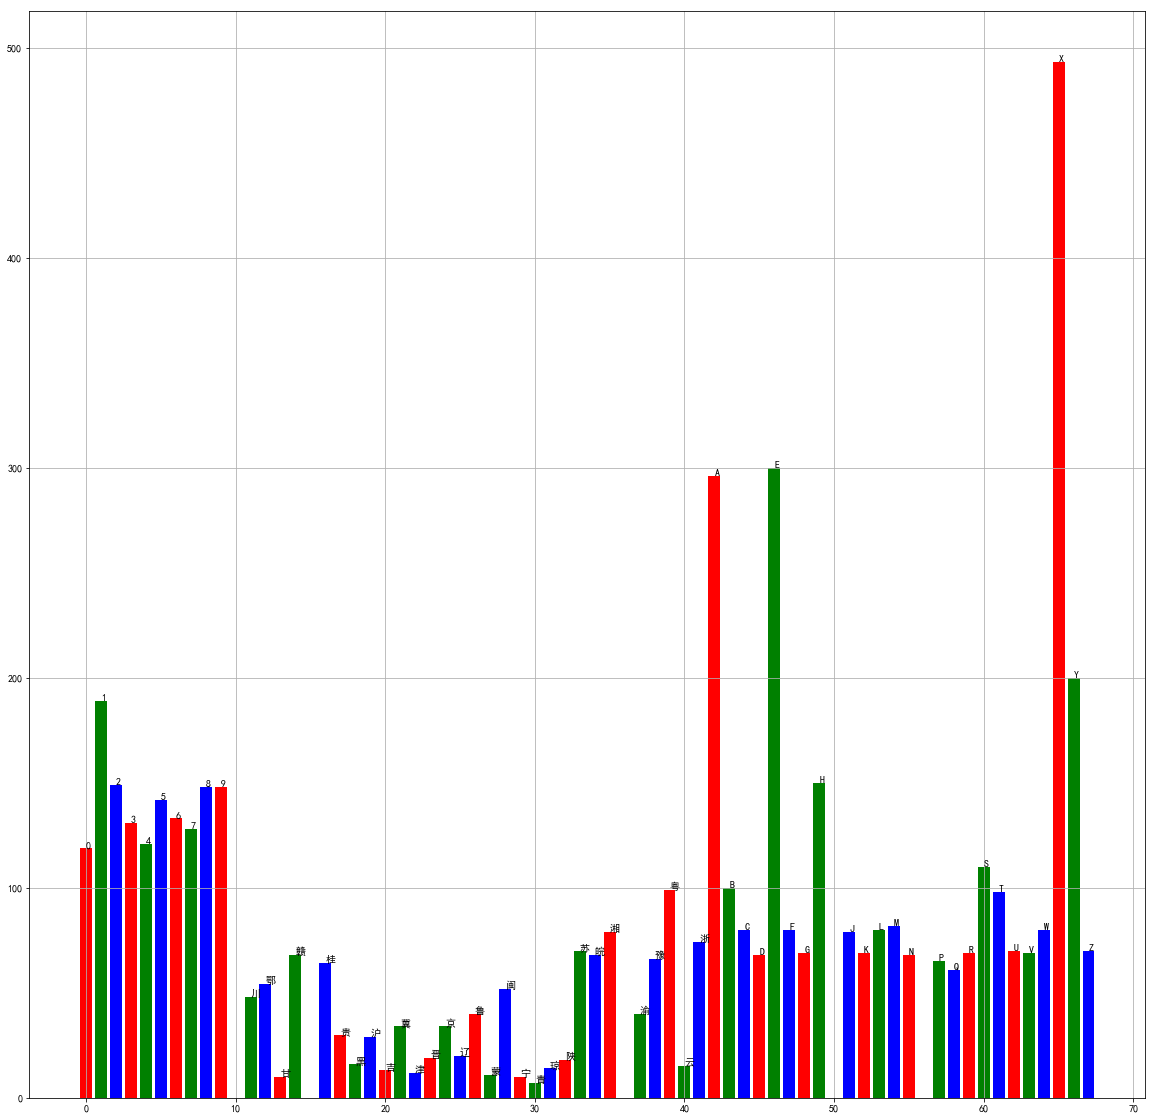

In [36]:
plt.figure(2, figsize=(20,20))  
plt.bar(list(letter_labels_count.keys()),list(letter_labels_count.values()),color='rgb')
ll = 0
for iii in dicts_dicts.keys():
    plt.text(list(letter_labels_count.keys())[ll],list(letter_labels_count.values())[ll],dicts_dicts[iii])
    ll+=1
plt.grid()
plt.show()

In [37]:
imgs_lan
lab_lan
c = list(zip(imgs_lan,lab_lan))
import random
random.shuffle(c)
imgs_lan[:],lab_lan[:]=zip(*c)

In [43]:
lbs = np.zeros([5428,68])
for i in range(len(lab_lan)):
    lbs[i][dict_dict[lab_lan[i]]]=1
for i in range(5428):
    imgs_lan[i] = imgs_lan[i].reshape(1152)
xtrains = imgs_lan[:]
ytests = lbs[:]

In [104]:
# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_o, labels=y))
# train_op = tf.train.AdamOptimizer().minimize(cost)
# prediction = tf.equal(tf.argmax(y_o, 1), tf.argmax(y, 1))
ylabel = tf.argmax(y_o,1)
# accuracys = tf.reduce_mean(tf.cast(prediction, tf.float32), name='accuracy')

train_data_x = xtrains
train_data_y = ytests
train_accuracy,y_label = sess.run([accuracy,ylabel], feed_dict={x_: train_data_x, y: train_data_y, keep_prob: 1.0})
print("step, accuracy: %g" % (train_accuracy))

step, accuracy: 0.905859


In [79]:
for e in dict_count_num.keys():
    print('%s的召回率为%1.1f'%(dicts_dicts[e],dict_count_num[e]/dict_count_nums[e]))

5428

In [110]:
# dict_count_num[np.argmax(train_data_y[j])]+=1
# if np.argmax(train_data_y[j]) == ylabels[j]:
#     dict_count_nums[ylabels[j]]+=1    

train_data_x = xtrains
train_data_y = ytests
train_accuracy,ylabesl = sess.run([accuracy,ylabel], feed_dict={x_: train_data_x, y: train_data_y, keep_prob: 1.0})


In [127]:
dict_count_num = {}
for i in dicts_dicts.keys():
    dict_count_num.update({i:0})
dict_count_nums = {}
for h in dicts_dicts.keys():
    dict_count_nums.update({h:0})
    
for oo in range(len(ylabesl)):
    if np.argmax(ytests[oo]) == ylabesl[oo]:
        dict_count_nums[ylabesl[oo]]+=1
for pp in ytests:
    dict_count_num[np.argmax(pp)]+=1
print("step, accuracy: %g" % (train_accuracy))
for p in dict_count_num.keys():
    print('%s的召回率为%1.1f'%(dicts_dicts[p],dict_count_nums[p]/dict_count_num[p]))

step, accuracy: 0.905859
0的召回率为1.0
1的召回率为1.0
2的召回率为1.0
3的召回率为1.0
4的召回率为1.0
5的召回率为1.0
6的召回率为1.0
7的召回率为1.0
8的召回率为1.0
9的召回率为1.0
川的召回率为1.0
鄂的召回率为1.0
甘的召回率为0.8
赣的召回率为1.0
桂的召回率为1.0
贵的召回率为0.9
黑的召回率为0.2
沪的召回率为0.9
吉的召回率为0.7
冀的召回率为0.6
津的召回率为0.2
晋的召回率为0.7
京的召回率为0.9
辽的召回率为0.2
鲁的召回率为1.0
蒙的召回率为0.7
闽的召回率为0.9
宁的召回率为0.7
青的召回率为0.7
琼的召回率为0.4
陕的召回率为0.8
苏的召回率为1.0
皖的召回率为1.0
湘的召回率为1.0
渝的召回率为0.1
豫的召回率为1.0
粤的召回率为0.9
云的召回率为0.5
浙的召回率为0.7
A的召回率为0.9
B的召回率为0.8
C的召回率为0.9
D的召回率为0.7
E的召回率为0.9
F的召回率为0.8
G的召回率为0.4
H的召回率为1.0
J的召回率为0.9
K的召回率为0.8
L的召回率为1.0
M的召回率为1.0
N的召回率为0.9
P的召回率为0.9
Q的召回率为1.0
R的召回率为0.9
S的召回率为0.7
T的召回率为0.9
U的召回率为0.5
V的召回率为0.7
W的召回率为1.0
X的召回率为1.0
Y的召回率为1.0
Z的召回率为1.0
